<a href="https://colab.research.google.com/github/Vyshnavi0918/Vyshnavi/blob/main/Customer_chrun_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Import the dependencies


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import pickle

#Data Loading and Understanding

In [6]:
# load teh csv data to a pandas dataframe
df = pd.read_csv("/content/Churn_Modelling.csv")

In [7]:
df.shape

(10000, 14)

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
pd.set_option("display.max_columns", None)

In [10]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
# print(df["RowNumber"].unique()) # This column does not exist.

In [14]:
# printing the unique values in all the columns
for col in df.columns:
  print(f'{col}: {df[col].unique()}')
  print('-'*50)





RowNumber: [    1     2     3 ...  9998  9999 10000]
--------------------------------------------------
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
--------------------------------------------------
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
--------------------------------------------------
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 68

Explortory Data Analysis

In [15]:
df.shape

(10000, 14)

In [16]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#Numerical Features-Analysis

Understand the distribution of teh numerical feautres


In [19]:
def plot_histograph(df, column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")


  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()


  # add vertical lines for mean and median
  plt.axvline(col_mean, color='red', linestyle="--", label="Mean")
  plt.axvline(col_median, color='green', linestyle="-", label="Median")

  plt.legend()

  plt.show()

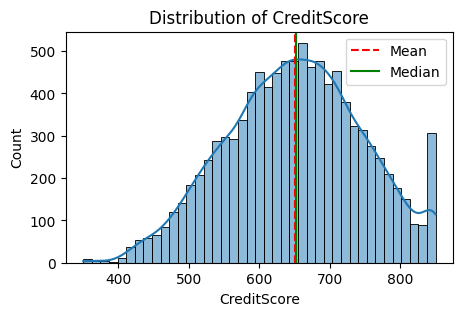

In [20]:
plot_histograph(df, 'CreditScore')

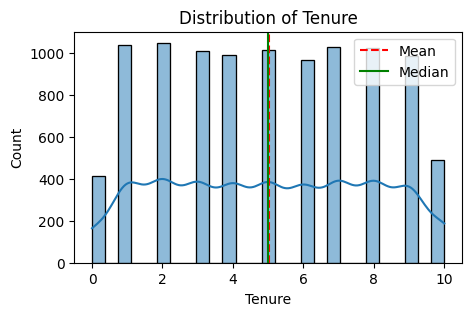

In [21]:
plot_histograph(df, 'Tenure')

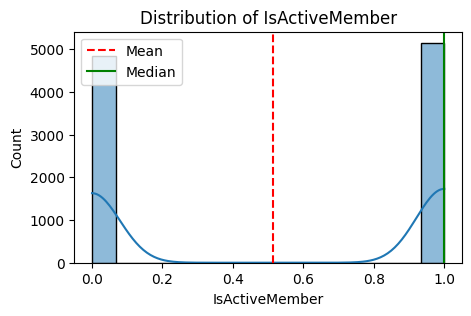

In [23]:
plot_histograph(df, 'IsActiveMember')

Box plot for numerical feautres

In [25]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

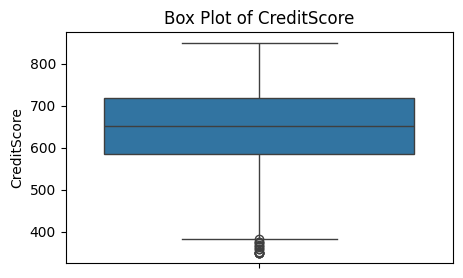

In [26]:
plot_boxplot(df, 'CreditScore')

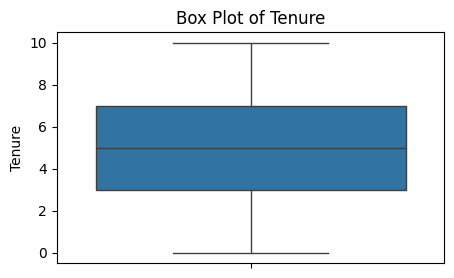

In [27]:
plot_boxplot(df, 'Tenure')

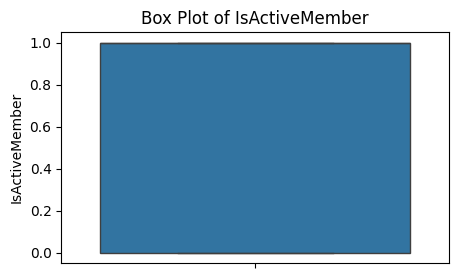

In [28]:
plot_boxplot(df, 'IsActiveMember')

Correlation Heatmap for numerical columns

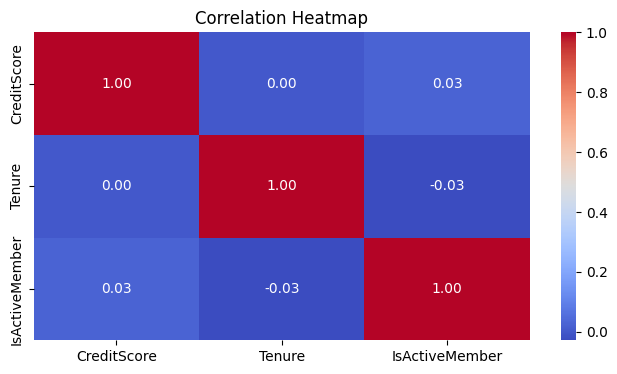

In [30]:
# correlation matrix = heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["CreditScore", "Tenure", "IsActiveMember"]].corr(), annot=True , cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical Feautres - Analysis

In [31]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Countplot for categorical columns

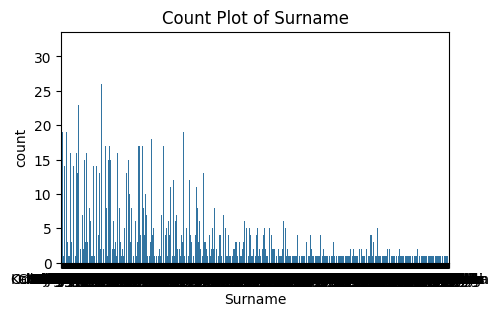

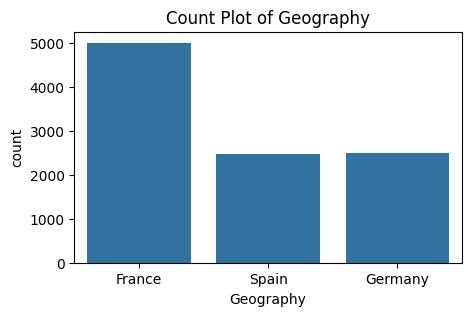

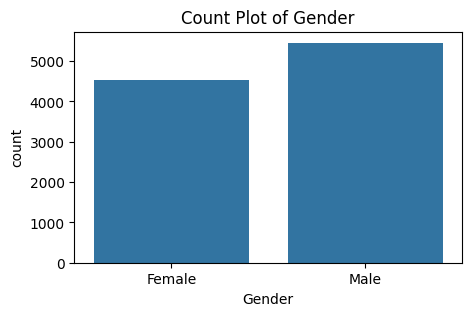

In [36]:
object_cols = df.select_dtypes(include="object").columns.to_list()

# object_cols = ["CreditScore"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

#Data Preprocessing

In [37]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


Label encoding of target column

In [42]:
# Label encoding of target column
df["IsActiveMember"]=df["IsActiveMember"].replace({0: "No", 1: "Yes"})

In [40]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [39]:
# print(df["IsActiveMember"].value_counts())

#Label encoding of categorical feautres

In [43]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [45]:
print(object_columns)

Index(['Surname', 'Geography', 'Gender', 'IsActiveMember'], dtype='object')


In [57]:
# identifying columns with object data type in X
object_columns = X.select_dtypes(include="object").columns

# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  X[column] = label_encoder.fit_transform(X[column])
  encoders[column] = label_encoder

  # save the encoders to a pickle file
  with open("encoders.pk","wb") as f:
    pickle.dump(encoders, f)

In [58]:
encoders

{}

In [59]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,Yes,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Yes,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,No,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,No,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Yes,79084.10,0


#Traning and test data split

In [99]:
# splitting the feautres and target
X = df.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y = df["Exited"]

# # Apply label encoding to categorical features before splitting
# object_columns = X.select_dtypes(include="object").columns
# encoders = {}
# for column in object_columns:
#     label_encoder = LabelEncoder()
#     X[column] = label_encoder.fit_transform(X[column])
#     encoders[column] = label_encoder

# # saving the encoders to a pickle file
# with open("encoders.pkl","wb") as f:
#     pickle.dump(encoders, f)

In [101]:
# Evaluate each model on the test data and print metrics
for model_name, model in models.items():
    print(f"Evaluating {model_name} on test data")
    model.fit(X_train, y_train)  # Fit the model on the training data
    y_pred = model.predict(X_test)

    print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 70)

Evaluating Decision Tree on test data
Accuracy Score:
 0.782
Confusion Matrix:
 [[1358  249]
 [ 187  206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000

----------------------------------------------------------------------
Evaluating Random Forest on test data
Accuracy Score:
 0.8645
Confusion Matrix:
 [[1546   61]
 [ 210  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------

In [62]:
print(X)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [63]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
print(y_train.shape)

(8000,)


In [65]:
print(y_train.value_counts())

Exited
0    6356
1    1644
Name: count, dtype: int64


#**Synthetic** **Minority Oversampling Techinique(SMOTE)**

In [66]:
smote = SMOTE(random_state=42)

In [67]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [68]:
print(y_train_smote.value_counts())

Exited
0    6356
1    6356
Name: count, dtype: int64


#Model Training

Traning with default hyperparameters

In [69]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(random_state=42) # Corrected typo here
}

In [102]:
# dictionary to store the cross validation results
cv_scores = {}

#perform 5-fold cross validation for each model
for model_name, model in models.items():
 print(f"Training {model_name} with default parameters")
 # Fit the model on the training data before cross-validation
 model.fit(X_train_smote, y_train_smote)
 scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
 cv_scores[model_name] = scores
 print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
 print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.85
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.86
----------------------------------------------------------------------


In [71]:
cv_scores

{'Decision Tree': array([0.72276838, 0.79787652, 0.81707317, 0.81510622, 0.82179386]),
 'Random Forest': array([0.76051907, 0.86315376, 0.89063729, 0.87883556, 0.89732494]),
 'XGBoost': array([0.76956351, 0.85292961, 0.89889851, 0.87332809, 0.88670338])}

In [72]:
# give code for metrics of above each algorithms

In [75]:
# load the csv data to a pandas dataframe
df = pd.read_csv("/content/Churn_Modelling.csv")

In [76]:
# splitting the feautres and target
X = df.drop(columns=["IsActiveMember"])
y = df["IsActiveMember"]

In [77]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Evaluate each model on the test data and print metrics
for model_name, model in models.items():
    print(f"Evaluating {model_name} on test data")
    model.fit(X_train, y_train)  # Fit the model on the training data
    y_pred = model.predict(X_test)

    print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 70)

Evaluating Decision Tree on test data
Accuracy Score:
 0.782
Confusion Matrix:
 [[1358  249]
 [ 187  206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000

----------------------------------------------------------------------
Evaluating Random Forest on test data
Accuracy Score:
 0.8645
Confusion Matrix:
 [[1546   61]
 [ 210  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------

In [100]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply label encoding to categorical features in X_train and X_test
object_columns = X_train.select_dtypes(include="object").columns
encoders = {}
for column in object_columns:
    label_encoder = LabelEncoder()
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])
    encoders[column] = label_encoder

# saving the encoders to a pickle file
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders, f)

In [104]:
# Evaluate each model on the test data and print metrics
for model_name, model in models.items():
    print(f"Evaluating {model_name} on test data")
    y_pred = model.predict(X_test)

    print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 70)

Evaluating Decision Tree on test data
Accuracy Score:
 0.782
Confusion Matrix:
 [[1358  249]
 [ 187  206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000

----------------------------------------------------------------------
Evaluating Random Forest on test data
Accuracy Score:
 0.8645
Confusion Matrix:
 [[1546   61]
 [ 210  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------

In [81]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42) # Corrected typo here
}

In [82]:
# Drop columns that are identifiers or irrelevant
X = df.drop(["CustomerId"], axis=1)   # Add more like ['CustomerId', 'RowNumber', 'Surname'] if needed
y = df["Exited"]   # Example target column

# Then split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
# Evaluate each model on the test data and print metrics
for model_name, model in models.items():
    print(f"Evaluating {model_name} on test data")
    y_pred = model.predict(X_test)

    print("Accuracy Score:\n", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 70)

Evaluating Decision Tree on test data
Accuracy Score:
 0.782
Confusion Matrix:
 [[1358  249]
 [ 187  206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000

----------------------------------------------------------------------
Evaluating Random Forest on test data
Accuracy Score:
 0.8645
Confusion Matrix:
 [[1546   61]
 [ 210  183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

------------

#Random Forest gives the highest accuracy compared to other models with default parameters

In [84]:
rfc = RandomForestClassifier(random_state=42)

In [85]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [86]:
print(y_test.value_counts())

Exited
0    1607
1     393
Name: count, dtype: int64


#Model Evaluation

In [106]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("-"*50)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("-"*50)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Accuracy Score:
 0.825
--------------------------------------------------
Confusion Matrix:
 [[1394  213]
 [ 137  256]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.65      0.59       393

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.82      0.83      2000



In [88]:
# save the trained model as a pickle file
model_data = {"model": rfc, "feautres_names": X.columns.tolist() }


with open("customer_churn_model.pkl", "wb") as f:
     pickle.dump(model_data, f)

Load the saved model and build a Predictive System

In [89]:
# load the saved model and the feautres names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

  loaded_model = model_data["model"]
  feautre_names = model_data["feautres_names"]

In [90]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [91]:
print(feautre_names)

['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [92]:
# Fit the best model (Random Forest) on the SMOTE-resampled training data
rfc.fit(X_train_smote, y_train_smote)

# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist() }


with open("customer_churn_model.pkl", "wb") as f:
     pickle.dump(model_data, f)

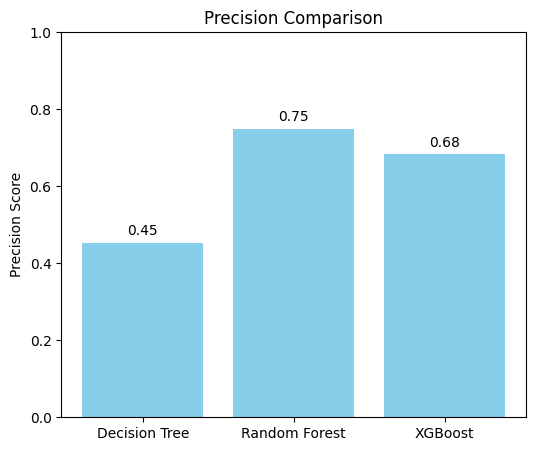

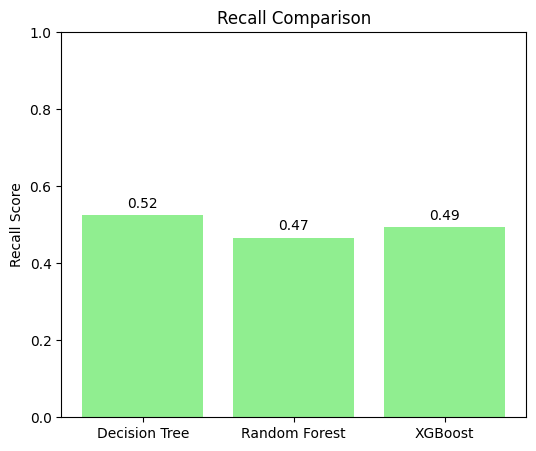

In [109]:
# Initialize dictionaries to store precision and recall scores
precision_scores = {}
recall_scores = {}

# Train & evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision_scores[name] = precision_score(y_test, y_pred)
    recall_scores[name] = recall_score(y_test, y_pred)

# Plot Precision
plt.figure(figsize=(6,5))
bars = plt.bar(precision_scores.keys(), precision_scores.values(), color="skyblue")
plt.title("Precision Comparison")
plt.ylabel("Precision Score")
plt.ylim(0, 1)

# Add values on top
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{bar.get_height():.2f}", ha="center", fontsize=10)

plt.show()

# Plot Recall
plt.figure(figsize=(6,5))
bars = plt.bar(recall_scores.keys(), recall_scores.values(), color="lightgreen")
plt.title("Recall Comparison")
plt.ylabel("Recall Score")
plt.ylim(0, 1)

# Add values on top
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f"{bar.get_height():.2f}", ha="center", fontsize=10)

plt.show()